In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
FILE = 'rdd_clean.parq.gzip'

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

In [15]:
data = pd.read_parquet(FILE)
data.head()

,spend_1m_baby,spend_2m_baby,spend_3m_baby,spend_4m_baby,spend_5m_baby,spend_6m_baby,spend_1m_clothes,spend_2m_clothes,spend_3m_clothes,spend_4m_clothes,spend_5m_clothes,spend_6m_clothes,spend_1m_health,spend_2m_health,spend_3m_health,spend_4m_health,spend_5m_health,spend_6m_health,spend_1m_pet,spend_2m_pet,spend_3m_pet,spend_4m_pet,spend_5m_pet,spend_6m_pet,spend_1m_groceries,spend_2m_groceries,spend_3m_groceries,spend_4m_groceries,spend_5m_groceries,spend_6m_groceries,spend_1m_eletronic,spend_2m_eletronic,spend_3m_eletronic,spend_4m_eletronic,spend_5m_eletronic,spend_6m_eletronic,sales,discount,profit,age,gender,cust_state,tenure
0,5,0,0,0,10,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,55,180,20.000000,10.000000,15.0,40.0,0,0,0,0.0,0.0,0.0,1442.30,4.0,66.93,30,0.0,MA,19
1,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0.000000,0.000000,0.0,0.0,0,0,0,0.0,0.0,0.0,883.96,2.0,41.33,30,1.0,MG,20
2,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,25,10,254.255197,289.255197,65.0,30.0,0,0,0,0.0,0.0,0.0,4900.67,224.0,15.88,29,0.0,RJ,21
3,0,0,0,0,0,0.0,25,25.0,0.0,25.0,25.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,30,10,5.000000,30.000000,0.0,45.0,0,0,0,0.0,0.0,0.0,1547.48,1.0,74.99,36,1.0,BA,18
4,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0.000000,10.000000,0.0,45.0,0,0,0,0.0,0.0,0.0,1335.23,13.0,52.41,37,0.0,PB,19


In [16]:
cutoff = 19
data['above_threshold'] = (data['tenure'] > cutoff).astype(int)

In [45]:
formula = 'discount ~ tenure + above_threshold + tenure:above_threshold'
fit = smf.ols(formula, data=data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               discount   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     857.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:03:43   Log-Likelihood:                -65365.
No. Observations:               10000   AIC:                         1.307e+05
Df Residuals:                    9996   BIC:                         1.308e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.9051     59.268      0.133      0.894    -108.272     124.082
tenure                     0.1118      3.263      0.034      0.973      -6.285       6.508
above_threshold          169.0512     63.728      2.653      0.008      44.132     293.970
tenure:above_threshold     0.8269      3.430      0.241      0.809      -5.896       7.550
==============================================================================
Omnibus:                     5105.557   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42883.878
Skew:                           2.308   Prob(JB):                         0.00
Kurtosis:                      12.035   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
by_tenure = data.groupby('tenure')['discount', 'above_threshold'].mean().reset_index()
by_tenure

/var/folders/36/gj41c8c14fnflx3h38bncgqm0000gn/T/ipykernel_57940/1682988041.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  by_tenure = data.groupby('tenure')['discount', 'above_threshold'].mean().reset_index()


,tenure,discount,above_threshold
0,15,11.606061,0.0
1,16,8.721519,0.0
2,17,9.633262,0.0
3,18,10.313053,0.0
4,19,9.882168,0.0
5,20,193.134067,1.0
6,21,201.152553,1.0
7,22,200.239635,1.0
8,23,191.514947,1.0
9,24,194.991266,1.0


In [47]:
by_tenure['predicted'] = fit.predict(by_tenure)
by_tenure

,tenure,discount,above_threshold,predicted
0,15,11.606061,0.0,9.582855
1,16,8.721519,0.0,9.694702
2,17,9.633262,0.0,9.806550
3,18,10.313053,0.0,9.918397
4,19,9.882168,0.0,10.030244
5,20,193.134067,1.0,195.731588
6,21,201.152553,1.0,196.670351
7,22,200.239635,1.0,197.609115
8,23,191.514947,1.0,198.547879
9,24,194.991266,1.0,199.486642


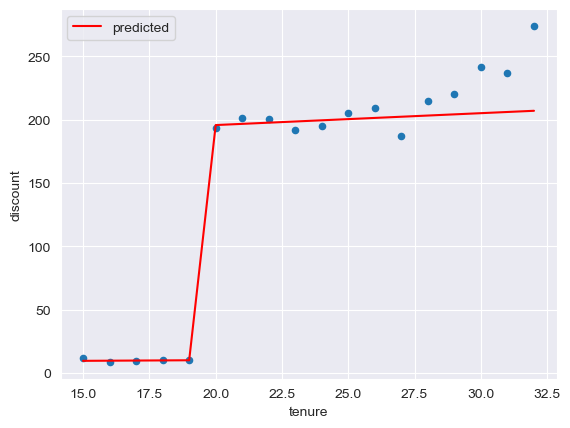

In [48]:
ax = by_tenure.plot(x='tenure', y='discount', kind='scatter')
by_tenure.plot(x='tenure', y='predicted', kind='line', ax=ax, color='red')
plt.ylabel('discount')
plt.show()

In [49]:
formula = 'profit ~ tenure + above_threshold + tenure:above_threshold'
fit_2 = smf.ols(formula, data=data).fit()
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     17.04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           4.90e-11
Time:                        08:04:45   Log-Likelihood:                -52868.
No. Observations:               10000   AIC:                         1.057e+05
Df Residuals:                    9996   BIC:                         1.058e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 50.7349     16.987      2.987      0.003      17.437      84.033
tenure                     0.1294      0.935      0.138      0.890      -1.704       1.963
above_threshold           -4.5468     18.265     -0.249      0.803     -40.351      31.257
tenure:above_threshold    -0.1608      0.983     -0.164      0.870      -2.088       1.766
==============================================================================
Omnibus:                     7588.126   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           764441.215
Skew:                           2.930   Prob(JB):                         0.00
Kurtosis:                      45.430   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
by_tenure = data.groupby('tenure')['profit', 'above_threshold'].mean().reset_index()
by_tenure

/var/folders/36/gj41c8c14fnflx3h38bncgqm0000gn/T/ipykernel_57940/3449442871.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  by_tenure = data.groupby('tenure')['profit', 'above_threshold'].mean().reset_index()


,tenure,profit,above_threshold
0,15,52.723939,0.0
1,16,53.821772,0.0
2,17,52.782111,0.0
3,18,52.680398,0.0
4,19,53.393001,0.0
5,20,45.844495,1.0
6,21,44.487213,1.0
7,22,47.701012,1.0
8,23,44.601138,1.0
9,24,43.279330,1.0


In [51]:
by_tenure['predicted'] = fit_2.predict(by_tenure)
by_tenure

,tenure,profit,above_threshold,predicted
0,15,52.723939,0.0,52.675241
1,16,53.821772,0.0,52.804595
2,17,52.782111,0.0,52.933949
3,18,52.680398,0.0,53.063303
4,19,53.393001,0.0,53.192657
5,20,45.844495,1.0,45.559711
6,21,44.487213,1.0,45.528291
7,22,47.701012,1.0,45.496872
8,23,44.601138,1.0,45.465452
9,24,43.279330,1.0,45.434032


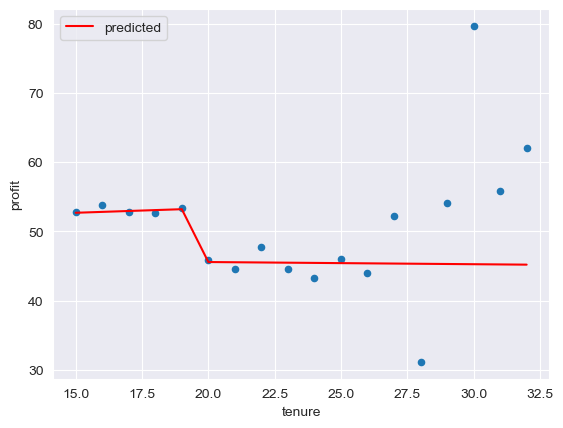

In [52]:
ax = by_tenure.plot(x='tenure', y='profit', kind='scatter')
by_tenure.plot(x='tenure', y='predicted', kind='line', ax=ax, color='red')
plt.ylabel('profit')
plt.show()